In [14]:
from django.db.models import Model

In [3]:
pip install tensorflow-gpu

  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached protobuf-3.15.1-cp37-cp37m-win_amd64.whl (904 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached Werkzeug-1.0.1-py2.p

In [1]:
# from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import cv2
from skimage.transform import resize

In [5]:
pip install pillow

  Using cached Pillow-8.1.0-cp37-cp37m-win_amd64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python

  Using cached opencv_python-4.5.1.48-cp37-cp37m-win_amd64.whl (34.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-image

  Using cached scikit_image-0.18.1-cp37-cp37m-win_amd64.whl (12.1 MB)
  Using cached tifffile-2021.2.1-py3-none-any.whl (159 kB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-win_amd64.whl (4.2 MB)
  Using cached matplotlib-3.3.4-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
!python -W ignore u2net_test.py

here?
main 1
image_dir : C:\Users\sewon\django_test\mytestsite\mytestsite\images
prediction_dir : C:\Users\sewon\django_test\mytestsite\mytestsite\results\
model_dir : C:\Users\sewon\django_test\mytestsite\mytestsite\saved_models\u2netp\u2netp.pth





main 2
data_loader here!!!
test salobj dataset : <data_loader.SalObjDataset object at 0x0000025C2EAAE448>
test salobj dataloader : <torch.utils.data.dataloader.DataLoader object at 0x0000025C2EAAE548>
...load U2NEP---4.7 MB
ici!!
inferencing: whoa.jpg


In [20]:
os.system('python u2net_test.py')

0

In [16]:
image_dir = os.path.join(os.getcwd(), 'images')
names = [name[:-4] for name in os.listdir(image_dir)]
names

['whoa']

In [5]:
print('current : '+str(os.getcwd()))

current : C:\Users\sewon\django_test\mytestsite\mytestsite


In [17]:
# this notebook only uses the first of the uploaded images
name = names[0]
name

'whoa'

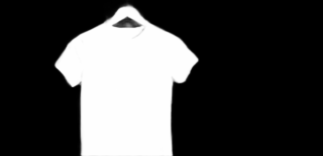

In [18]:
output = load_img('./results/'+name+'.png')
display(output)

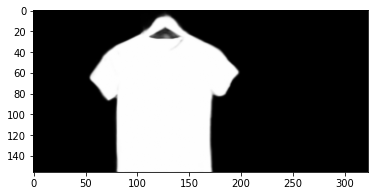

In [19]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE
import matplotlib.pyplot as plt
plt.imshow(out_img)

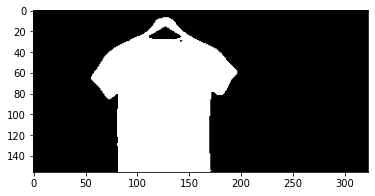

In [20]:
# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.9

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

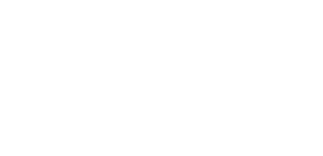

In [21]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Img.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

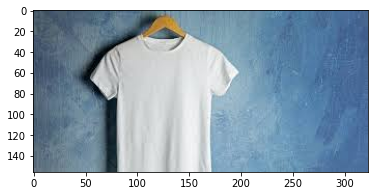

In [22]:
# load and convert input to numpy array and rescale(255 for RBG images)
input = load_img('./images/'+name+'.jpg')
inp_img = img_to_array(input)
inp_img /= RESCALE
plt.imshow(inp_img)

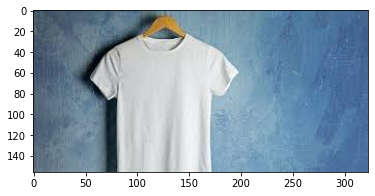

In [23]:
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
plt.imshow(rgba_inp)

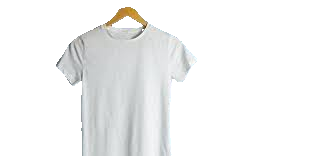

In [24]:
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# --same, but using cv2--
#rem_back_cv = rem_back[:,:,[2,1,0,3]]
#from google.colab.patches import cv2_imshow
#cv2_imshow(rem_back_cv*RESCALE)